### Genetic alg fitting.
This notebook is used for fitting currents, etc via the genetic algorithm 

<code>
source ../configgotran.bash 
</code>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt 
# routlines for analyzing odes
import analyzeGotran as aG

#### Simple run (no fitting)
Here we perform a quick simulation to examine the default behavior of the code.
Run the following: 
<code> 
$export ODEFILEfitted=microgliav48.ode
$ python2.7 daisychain.py -dt 0.1 -dSr 1000 -jit -odeName $ODEFILEfitted -T 20e3 -iters 1 -var V_ptxs -0.06 -var stim_amplitude 100 -var stim_period 60e3 -var stim_gap1 50e3 -var        stim_gap2 50e3 -var stim_low 1e3 -var stim_high 10e3 -name test
</code>
This will spit out a file called test_cat.pickle

Reading test_cat.pickle


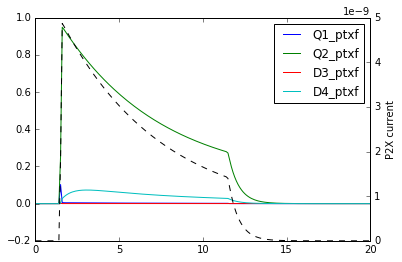

In [3]:
data = aG.readPickle("test_cat.pickle")
keys = ["Q1_ptxf", "Q2_ptxf","D3_ptxf","D4_ptxf" ]#,"D3_ptxf ","D4_ptxf "]
fig,ax1=  plt.subplots(1)

for key in keys:
    
    stateLabel = key#  + Q2_ptxf"
    subData = aG.GetData(data,stateLabel)
    # data is stored as
    # subData.t - time
    # subData.valsIdx - values of 'stateLabel' state
    ax1.plot(subData.t,subData.valsIdx, label=key)

stateLabel = "I_ptxf"
subData = aG.GetData(data,stateLabel)
ax2 = plt.twinx(ax1)
ax2.plot(subData.t,-1*subData.valsIdx, "k--")
ax2.set_ylabel("P2X current")
ax1.legend()
plt.gcf().savefig("x.png")


#### Fitting the current to a single value (like a maximum current) 
For this first example, we'll assume we know that the peak current should be 6 pA 
<code>
$python fittingAlgorithm.py -odeModel microgliav48.ode -fixedvars P2X4FitVar.yaml -myVariedParam k1_ptxf -variedParamTruthVal 1e-4 -timeStart 0e3 -jobDuration 20e3 -numRandomDraws 2  -numIters 2 -sigmaScaleRate 0.15 -outputParamName I -outputParamSearcher I_ptxf -outputParamMethod min -outputParamTruthVal -6e-9      -debug
</code>

- fixedVars YAML contains a set of parameter values that are supplied to the .ode file, but are NOT randomized. I use this to set the ATP profile characteristics, for instance
- myVariedParam NAME defines the parameter I want to vary
- variedParamTruthVal FLOAT defines the params starting value
- timeStart FLOAT discards data before this timepoint
- numRandomDraws INT  number of random draws per iteration (< #procs)
- numIters INT number of iterations of search
- sigmaScaleRate FLOAT controls rate at which 'range' of random variates decreases, as you hone in on a solution
- outputParamSearcher ODESTATENAME provides the name of the output in the .ode file you want to analyze
- outputParamMethod MIN/MAX/MEAN provides which quantity you want to compute from your output
- outputParamTruthVal FLOAT value that you want to obtain 

If run from command line, you'll get an output like this:
<code>
           G12_ptxf            I   jobID jobNum       fitness
0_3483  2.22064e-13 -4.86972e-09  0_3483      0  1.130285e-09
1_3484  2.89325e-13  -6.3447e-09  1_3484      1  3.447005e-10
jobFitnesses:  [  1.13028482e-09   3.44700454e-10]
jobIndex:  1
bestVarDict:  {'G12_ptxf': 2.8932524582876968e-13}
iter 2  out of 2
</code>

In this case, the best value found so far is 2.89e-13 (higher in amplitude than what we started with, which makes sense since our current in pA was originally 5 and we wanted 6)


#### 'Scalar' fitting within the notebook
Below we'll do this in the notebook, which makes life a bit simpler 

In [4]:
#python fittingAlgorithm.py 
import fittingAlgorithm as ga

Here we run everything. The best fit parameter is contained in results
results['bestFitParam']


Fixing random seed

timeRange:  [1.5, 20.0]
iter 1  out of 1
parmDict:  {'G12_ptxf': [2.22e-13, 0.2]}
Inputs:  G12_ptxf 2.22e-13
Using 2 cores for 2 jobs
Should probably rescale sigma by the tolerated error vs current error
Multi-threading
result:  -5.61702199489e-09 truthValue:  -6e-09
result:  -6.35386401374e-09 truthValue:  -6e-09
myDataFrame: 
            G12_ptxf            I    jobID jobNum       fitness
0_22548  2.56142e-13 -5.61702e-09  0_22548      0  3.829780e-10
1_22549  2.89743e-13 -6.35386e-09  1_22549      1  3.538640e-10
jobFitnesses:  [  3.82978005e-10   3.53864014e-10]
jobIndex:  1
previousDraw:  3.53864013737e-10
bestVarDict:  {'G12_ptxf': 2.8974310417065284e-13}
iter 1  out of 1

######

Best fit parameter 2.89743104171e-13
Leaving!!
Worker bee 22524, Job 0 
Loaded ODE model 'microgliav48' with:
Worker bee 22548, Job 0 
Worker bee 22549, Job 1 
Loaded ODE model 'microgliav48' with:
Loaded ODE model 'microgliav48' with:
     Num full states: 41
     Num full states: 

INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:     Num full states: 41
INFO:ModelParameters:     Num full states: 41
INFO:ModelParameters:      Num parameters: 129
INFO:ModelParameters:      Num parameters: 129


     Num full states: 41


INFO:ModelParameters:     Num full states: 41


      Num parameters: 129


INFO:ModelParameters:      Num parameters: 129


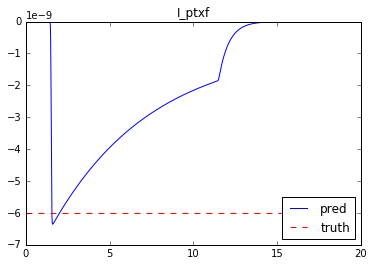

In [5]:
testState = "I_ptxf"
results = ga.run(
    odeModel = "microgliav48.ode",
    yamlVarFile = "P2X4FitVar.yaml" ,
    myVariedParam = "G12_ptxf",
    variedParamTruthVal = 2.22e-13  ,
    timeStart = 1.5e3,
    jobDuration = 20e3,
    numRandomDraws = 2,
    numIters = 1,
    sigmaScaleRate = 0.15,
    outputParamName = "I",
    outputParamSearcher = testState,
    outputParamMethod = "min",
    outputParamTruthVal=-6e-9,
    debug = True
)

### Fitting a time-dependent profile (vector) 
A more complicated example in which a time-dependent profile is compared.
Below we first load the reference data 

<font color=red>
WARNING: I'm rescaling the Toulme data by a factor of 40, since their transgenic model behaves as if it is activated and we'd like values more apporpriate for resting glia. The 1e-9 factor is for converting into uC/ms <--- PLease verify
</font>


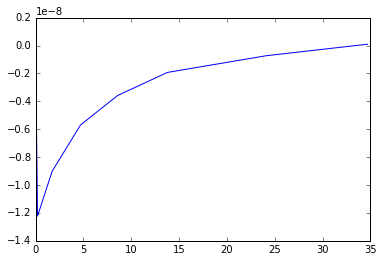

In [6]:
scale = 1/30. * 1e-9
expdata = np.loadtxt("../validation/Toulme2012_Fig6c.csv",skiprows=4, delimiter=",")
expdata[:,1]*=scale
plt.plot(expdata[:,0],expdata[:,1])

We chose an offset to account for any difference between the exp. data and when the channel fires in our data. This took some playing around. Easiest to debug this when looking at the best fit graph at the end of the calculation. Also, I interpolated the experimental over about 10 s. Need to also play around with interpolation points too so they fairly approximate the complete data 

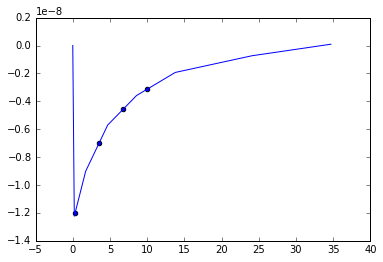

In [7]:

expInterpTs = np.linspace(0.3,10,4)  # point at t=0 was pretty bad
expInterpVals = np.interp(expInterpTs,expdata[:,0],expdata[:,1])
plt.plot(expdata[:,0],expdata[:,1])
plt.scatter(expInterpTs,expInterpVals)


# here I apply the offset to align with the model predictions
# also the exptl data is in seconds 
expInterpTs*= 1e3
offset = 1.55e3 # ms
expInterpTs+= offset

In [8]:
print offset
print expInterpTs
print expInterpVals

1550.0
[  1850.           5083.33333333   8316.66666667  11550.        ]
[ -1.20281992e-08  -6.99941340e-09  -4.57058278e-09  -3.13184584e-09]



Fixing random seed

timeRange:  [1.55, 20.0]
iter 1  out of 1
parmDict:  {'G12_ptxf': [4.22e-13, 0.2]}
Inputs:  G12_ptxf 4.22e-13
Using 2 cores for 2 jobs
Should probably rescale sigma by the tolerated error vs current error
Multi-threading
result:  [ -1.03170293e-08  -6.56378128e-09  -4.37276149e-09  -2.85919941e-09] truthValue:  [ -1.20281992e-08  -6.99941340e-09  -4.57058278e-09  -3.13184584e-09]
result:  [ -1.16704192e-08  -7.42481937e-09  -4.94638118e-09  -3.23426900e-09] truthValue:  [ -1.20281992e-08  -6.99941340e-09  -4.57058278e-09  -3.13184584e-09]
myDataFrame: 
            G12_ptxf                                                  I  \
0_22577  4.86901e-13  [-1.0317029318e-08, -6.56378127624e-09, -4.372...   
1_22578  5.50773e-13  [-1.16704191836e-08, -7.42481936714e-09, -4.94...   

           jobID jobNum       fitness  
0_22577  0_22577      0  1.797595e-09  
1_22578  1_22578      1  6.787428e-10  
jobFitnesses:  [  1.79759483e-09   6.78742768e-10]
jobIndex:  1
previousDr

INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:Loaded ODE model 'microgliav48' with:
INFO:ModelParameters:     Num full states: 41
INFO:ModelParameters:     Num full states: 41
INFO:ModelParameters:      Num parameters: 129
INFO:ModelParameters:      Num parameters: 129


     Num full states: 41


INFO:ModelParameters:     Num full states: 41


      Num parameters: 129


INFO:ModelParameters:      Num parameters: 129


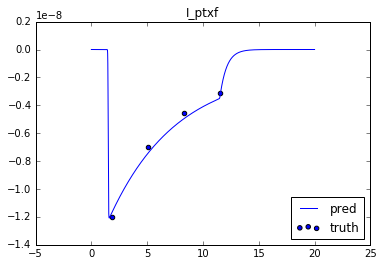

In [9]:
testState = "I_ptxf"

results = ga.run(
    odeModel = "microgliav48.ode",
    yamlVarFile = "P2X4FitVar.yaml" ,
    myVariedParam = "G12_ptxf",
    variedParamTruthVal = 4.22e-13  , # was 2.22e-13 in code, but bumping it up a bit
    timeStart = offset,
    jobDuration = 20e3,
    numRandomDraws = 2,
    numIters = 1,
    sigmaScaleRate = 0.15,
    outputParamName = "I",
    outputParamSearcher = testState,
    outputParamMethod = "val_vs_time",
    outputParamTruthTimes=expInterpTs,
    outputParamTruthVal=expInterpVals,
    debug = True
)

Should you wish to compare the results on your own, you can run the following. 
The code saves a figure like this automatically though

(200001,)


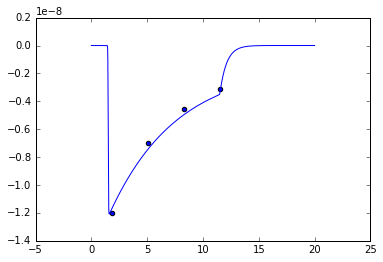

In [10]:
#print results['outputList']['I'].timeInterpolations
data = results['data']
#data = aG.readPickle("test_cat.pickle")
stateLabel = "I_ptxf"
subData = aG.GetData(data,stateLabel)
i=0
ts = subData.t[i:]
vals = subData.valsIdx[i:]
print np.shape(subData.valsIdx)

#normedPred = vals/np.min(vals)
plt.plot(ts,vals,label="pred")

plt.scatter(expInterpTs, expInterpVals)
